# The Racial Dynamics of Drug Abuse Arrests in the United States (2010–2019)  
**Author:** Kun Cheng  
**Date:** May 4, 2025  
> **Generative AI Disclaimer:**  
> Note: Generative AI was used to help generate some of the code in this project..

---

## Introduction

<div align="center">
  <img
    src="../assets/img/harry.webp"
    width="30%"
    style="border: 2px solid"
    alt="Description of image"
  />
  <figcaption style="font-style: italic">
    Harry Anslinger. The individuals who dominated the US drug law enforcement policies during the 1930s to 1960s.
  </figcaption>
</div>

Over the past century, the drug policy in the United States has been oscillating between public health strategies and punitive law enforcement approaches. Initially, substances such as heroin, cocaine, and marijuana were widely accessible through legal channels in patent medicines and soft drinks. However, later on, they gradually evolved into a moral panic, with the focus on convicting users – especially those from black, Latino, and other non-white communities. As Billie Holiday put it in her autobiography: "Imagine the government going after people with diabetes, taxing insulin and pushing it into the black market... We actually treated those addicted to drugs in this way every week." This paradox of regarding people with medical or social needs as criminal threats laid the foundation for Harry Anslinger's decades-long "War on Drugs." This war sought to justify increasingly strict laws and mass incarceration through sensational media propaganda and veiled racial rhetoric.

<div align="center">
  <img
    src="../assets/img/billie.webp"
    width="30%"
    style="border: 2px solid"
    alt="Description of image"
  />
  <figcaption style="font-style: italic">
    Billie Holiday.
  </figcaption>
</div>

In the following decades, the drug policy of the United States continued to waver between medicalization, the framework of harm reduction and increasingly severe criminal penalties. In 1970, Controlled Substances (Ac) incorporated the severe sanctions initiated by Ansling into law, but in the same decade, public health experts also called for the first treatment-oriented approach. However, in the 1980s and 1990s, "zero-tolerance" law enforcement was prevalent, causing the number of arrests and prisons to reach new highs, and the impact on non-white communities was particularly severe. Scholars have demonstrated how this repetition between public health and punishment models erods addiction treatment and deep-rooted racial disparities in law enforcement (Wodak & Ireland, 1999).

This project conducted a more in-depth study on the data from Table 43a of FBI's Uniform Crime Report for the past decade, with a particular focus on the number of arrests for "Drug abuse violations" in 2005,2010, 2015 and 2019（https://ucr.fbi.gov/crime-in-the-u.s/ ）. By comparing the absolute numbers and relative proportions of the number of arrests among the four racial categories (White, Black, Native American/Alaska Native, and Asian and Pacific Islander), I attempted to answer the following questions:
1. How have the absolute numbers of drug‐related arrests for White, Black, Native American, and Asian/Pacific Islander populations changed at four benchmark years: 2005, 2010, 2015, and 2019?
2. How have the relative shares (percentages) of those racial groups within total drug arrests shifted over time?
3. What do these temporal patterns reveal about law enforcement priorities and potential systemic biases?

By situating the statistical patterns within the broader historical context of the "war on drugs", our aim is to clarify how law enforcement practices continue to reflect and reinforce the long-standing racial inequality within the American criminal justice system.

## Methodology

**Data Source and Selection.** I obtained the FBI Uniform Crime Report Table 43a for four years (2005, 2010, 2015, and 2019) respectively. From each xsl table, I extracted the data marked as "Drug Abuse Violations" in the row, as well as the columns containing the total number of arrests and the number of arrests by race: White, Black (or African American), American Indian/Alaska Native ("Native"), and Asian/Pacific Islander ("Asian_PI").

**Data cleaning and validation.** In a separate notebook script, I:
- Standardized column names (e.g. “White” vs. “White arrests,” “Asian or Pacific Islander”).

In [8]:
import pandas as pd

df_2005 = pd.read_excel("../data/oringinal/05-table-43a.xls", skiprows=5)
df_2010 = pd.read_excel("../data/oringinal/10-table-43a.xls", skiprows=5)
df_2015 = pd.read_excel("../data/oringinal/15-table-43a.xls", skiprows=6)
df_2019 = pd.read_excel("../data/oringinal/19-table-43a.xls", skiprows=6)

def standardize_race_cols(df, year):
    black_col  = [c for c in df.columns if "black" in c.lower()][0]
    native_col = [c for c in df.columns if "indian" in c.lower()][0]
    if year == 2010 or 2005:
        pi_col = [c for c in df.columns if "pacific" in c.lower() and "1" not in c][0]
        df["Asian_PI"] = df[pi_col]
    else:
        asian_col = [c for c in df.columns if c.lower().startswith("asian") and "1" not in c][0]
        pi_col    = [c for c in df.columns if "pacific" in c.lower() and "1" not in c][0]
        df["Asian_PI"] = df[asian_col] + df[pi_col]
    df.rename(columns={black_col: "Black", native_col: "Native"}, inplace=True)
    return df

df_2005 = standardize_race_cols(df_2005, 2005)
df_2010 = standardize_race_cols(df_2010, 2010)
df_2015 = standardize_race_cols(df_2015, 2015)
df_2019 = standardize_race_cols(df_2019, 2019)

- Coerced all arrest counts to integers and ensured the “Year” field was present. Merge the data into a new data set.

In [9]:
def find_off_col(df):
    return [c for c in df.columns if "off" in c.lower()][0]

off_2005 = find_off_col(df_2005)
off_2010 = find_off_col(df_2010)
off_2015 = find_off_col(df_2015)
off_2019 = find_off_col(df_2019)

keep = ["Year","Total","White","Black","Native","Asian_PI"]
rows = []
for df, off_col, year in [
    (df_2005, off_2005, 2005),
    (df_2010, off_2010, 2010),
    (df_2015, off_2015, 2015),
    (df_2019, off_2019, 2019),
]:
    r = df[df[off_col].str.contains("drug abuse", case=False, na=False)].copy()
    r["Year"] = year
    rows.append(r[keep])

df_drug = pd.concat(rows, ignore_index=True)

df_drug

,Year,Total,White,Black,Native,Asian_PI
0,2005,1330802.0,861645.0,451375.0,8600.0,9182.0
1,2010,1270443.0,846736.0,404609.0,8766.0,10332.0
2,2015,1136950.0,803809.0,307140.0,11717.0,1848.0
3,2019,1052101.0,748874.0,274670.0,14098.0,2602.0


**Limitations.** The data we have adopted, which is collected once every four years, cannot cover the fluctuations and changes between years or the variations in local policies. Factors such as changes in the FBI's reporting guidelines, differences in law enforcement budgets among states, and changes in prosecutors' discretion could all affect the number of arrests. We regard the FBI's data as the best national law enforcement trend indicator we can obtain, and at the same time, we acknowledge these limitations.

**Supplementary Explanation.** During the cleaning process, I discovered that the column names of the original tables from 2005/2010 were slightly different from those of 2015/2019.
- In 2005/2010, "Asian or Pacific Islander" was a separate column;
- In 2015/2019, it appeared as "Asian" and "Native Hawaiian or Other Pacific Islander" respectively.

To ensure comparability between years, I:
1. Matched and renamed the columns "Black" and "Native American";
2. Added the two columns that belonged to "Asian or Pacific Islander" to obtain a unified "Asian_PI";
3. Finally, I filtered out the "Drug Abuse Violations" row and merged the data for the four years.

These steps not only ensure consistency in the classification of ethnic groups across different years, but also try to retain the original statistical data of each ethnic group.

## Main Analysis ##

In our main analysis, we reviewed the drug abuse arrest data from the past 15 years - 2005, 2010, 2015, and 2019 - to understand the actual enforcement pressure and the relative burden borne by different racial groups. We used four complementary visual charts to tell a more detailed story, including which groups were subject to the strictest enforcement supervision, how the enforcement focus changed (or remained the same), and the possible deeper structural factors behind these patterns.

**Absolute Counts by Race**

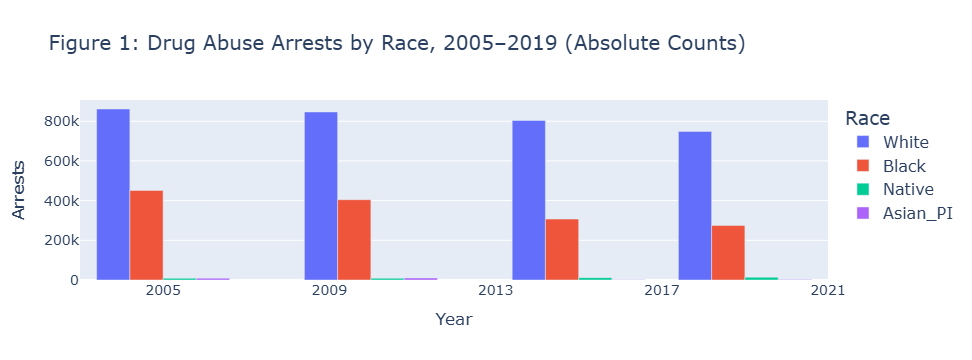

In [11]:
import plotly.io as pio
import plotly.offline as pyo
pio.renderers.default = "jupyterlab"
pyo.init_notebook_mode(connected=True)

import plotly.express as px
import pandas as pd
cleaned_df = pd.read_csv("../data/processed/cleaned_table43_drug_abuse.csv")

df_melt = df_long = cleaned_df.melt(
    id_vars="Year",
    value_vars=["White","Black","Native","Asian_PI"],
    var_name="Race",
    value_name="Arrests"
)
fig1 = px.bar(
    df_melt, x="Year", y="Arrests", color="Race",
    barmode="group",
    title="Figure 1: Drug Abuse Arrests by Race, 2005–2019 (Absolute Counts)"
)
fig1.update_layout(
    font=dict(size=14),          
    title_font_size=20,          
    legend_font_size=16          
)
fig1.show()


When I examined the uncorrected arrest data, two things stood out particularly. Firstly, the number of arrests of white individuals has consistently dominated: in 2005, the number of white individuals arrested for drug abuse was approximately 860,000, and in 2019 it dropped to approximately 750,000. Although the number has decreased, since the total number of arrests for drug abuse has been declining, the proportion of white individuals arrested is actually increasing. This will be mentioned in the subsequent analysis. Secondly, although the number of arrests of black individuals is relatively small in absolute terms (dropping from approximately 450,000 in 2005 to approximately 270,000 in 2019), this does not indicate that the law has begun to relax for black individuals: the per capita arrest rate of black Americans is nearly twice that of white Americans, although their proportion in the total population is much smaller. The annual arrest numbers of Native Americans and Asian/Pacific Islanders still account for only a very small minority, but when the number of non-white individuals is so small, even a very small absolute change can have a considerable proportional impact on these groups.

**Relative Shares Over Time**

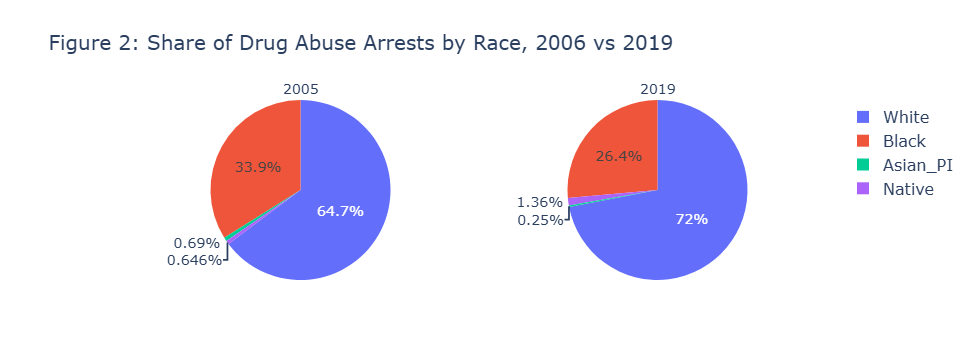

In [15]:
df_pct = cleaned_df.copy()
df_pct[['White','Black','Native','Asian_PI']] = (
    df_pct[['White','Black','Native','Asian_PI']].div(df_pct['Total'], axis=0) * 100
)

df_long = df_pct.melt(
    id_vars='Year',
    value_vars=['White','Black','Native','Asian_PI'],
    var_name='Race',
    value_name='Percent'
)

df_compare = df_long[df_long['Year'].isin([2005, 2019])]

fig = px.pie(
    df_compare,
    names='Race',
    values='Percent',
    facet_col='Year',
    title='Figure 2: Share of Drug Abuse Arrests by Race, 2006 vs 2019'
)

fig.update_layout(
    font=dict(size=14),          
    title_font_size=20,          
    legend_font_size=16          
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))

fig.show()

These absolute figures may conceal an important issue: Among all the arrested individuals, which groups were subjected to the greatest pressure during the law enforcement process? In Figure 2, I compared the pie charts of the number of arrests for each group in 2005 and 2019. Through this comparison, we can observe that the proportion of arrested whites rose from approximately 64% to 72%. This increase coincides with the intensified prosecution of opioid drugs, especially in predominantly white suburban areas - an area that the US criminal justice system had not previously addressed in law enforcement. The proportion of blacks slightly decreased - from approximately 34% in 2005 to approximately 26% in 2019 - but this decline masks a substantive policy change: As white opioid users attracted new law enforcement attention, black communities still suffered excessive law enforcement due to the "drug war" strategies focused on crimes in these communities. Meanwhile, the proportions of Native Americans and Asians remained at approximately 1.5%.

**Stacked Composition**

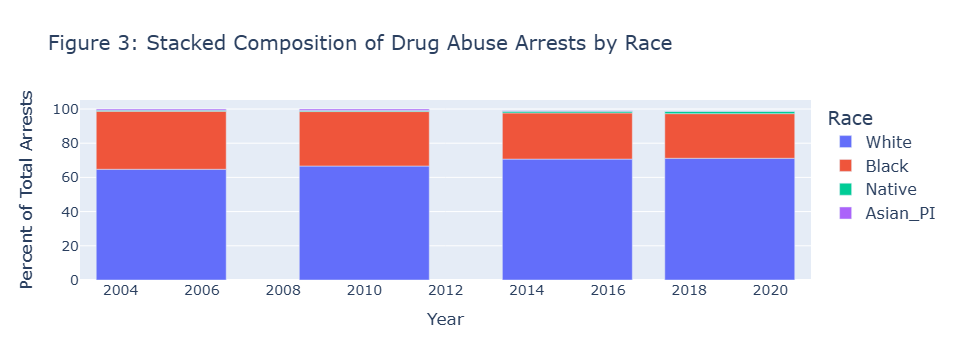

In [16]:
fig3 = px.bar(
    df_pct, x="Year",
    y=["White","Black","Native","Asian_PI"],
    title="Figure 3: Stacked Composition of Drug Abuse Arrests by Race",
    labels={"value":"Percent of Total Arrests", "variable":"Race"}
)
fig3.update_layout(
    font=dict(size=14),          
    title_font_size=20,          
    legend_font_size=16          
)
fig3.show()


Figure 3 presents these four groups in a hierarchical manner to visually illustrate the composition of the total number of arrests each year. Although the total number of arrests rose from approximately 1.2 million in 2005 to a peak of approximately 1.5 million in 2015, the proportions of each race in the "pie chart" changed very little. White Americans consistently occupied about seven-tenths of the volume; Blacks account for approximately 30% of the total population and this proportion continues to decline; and the combined proportion of Native Americans/Asians remained below 2%. This visual presentation powerfully demonstrates the fact that, despite the numerous eye-catching remarks about the focus of new opioid drug prosecutions, the overall law enforcement framework has not truly achieved diversity - the old patterns targeting Black and Brown communities still exist, while new law enforcement actions targeting white suburbs are also continuing.

**Arrest Ratio**

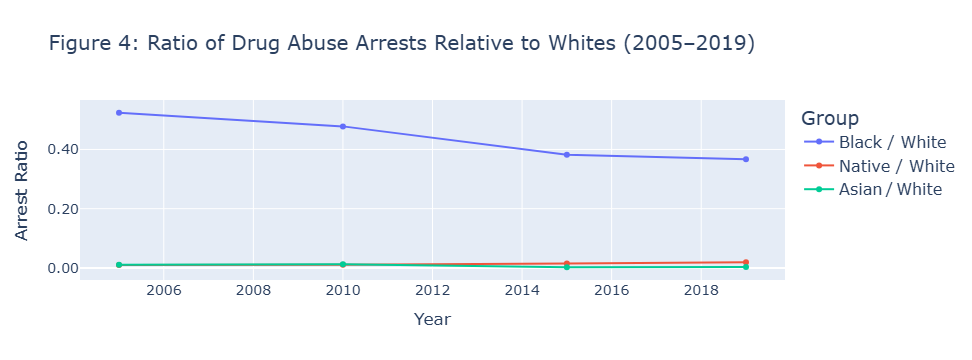

In [13]:
df = pd.read_csv("../data/processed/cleaned_table43_drug_abuse.csv")

df["Black_to_White"]    = df["Black"]    / df["White"]
df["Native_to_White"]   = df["Native"]   / df["White"]
df["AsianPI_to_White"]  = df["Asian_PI"] / df["White"]

ratio_df = df.melt(
    id_vars="Year",
    value_vars=["Black_to_White", "Native_to_White", "AsianPI_to_White"],
    var_name="Group",
    value_name="Ratio"
)
ratio_df["Group"] = ratio_df["Group"].map({
    "Black_to_White": "Black / White",
    "Native_to_White": "Native / White",
    "AsianPI_to_White": "Asian / White"
})

fig4 = px.line(
    ratio_df,
    x="Year",
    y="Ratio",
    color="Group",
    markers=True,
    title="Figure 4: Ratio of Drug Abuse Arrests Relative to Whites (2005–2019)",
    labels={"Ratio":"Arrest Ratio","Year":"Year"}
)
fig4.update_layout(
    font=dict(size=14),          
    title_font_size=20,          
    legend_font_size=16          
)
fig4.update_yaxes(tickformat=".2f")
fig4.show()


In addition to looking at the absolute numbers and proportions, I also introduced the "relative law enforcement ratio": using the number of white arrests as the benchmark, calculating the arrest ratios of other ethnic groups (Black/White, Native/White, Asian/White).

As can be seen from Figure 4, the arrest ratio of blacks relative to whites was approximately 0.52 in 2005, meaning that for every 100 white drug arrests that year, there were approximately 52 black arrests; but since then this proportion has gradually declined, reaching nearly 0.37 in 2019. This might indicate that the relevant drug policies have changed.

At the same time, the ratio for Native Americans rose from 0.01 to 0.02, with the most significant increase; the ratio for Asians/Pacific Islanders remained below 0.01, indicating that they were relatively "lightly" focused in drug law enforcement.
This ratio perspective can more directly reveal the differences in law enforcement resources or judicial tendencies among different ethnic groups, and also provides quantitative support for subsequent discussions on cultural bias and institutional injustice.

**Key Findings**

- Stable Racial Composition: Despite a 25% increase in total arrests over the period, the share of arrests by race remained nearly constant (White ~70%; Black ~28%; others <2%).

- Decline in Black-to-White Ratio: The relative arrest rate for Black individuals fell from 0.52 to 0.37 (2005 → 2019), suggesting a relative drop in drug‐related arrests among Black communities compared to White.

- Increase in Native American Ratio: Native American arrests rose from 1% to 2% of the White benchmark, the largest proportional gain among non-White groups.

- Minimal Focus on Asians/PI: Asian/Pacific Islander arrests remained under 1% of the White baseline throughout, indicating comparatively low targeting.

- Persistent Disparities: Even with some shifts, long-standing patterns of disproportionate enforcement against Black and Brown communities endure alongside growing attention to White suburbs.

**Deeper Interpretations and Context**

Since the beginning of the 21st century, the opioid epidemic has triggered a significant shift in law enforcement strategies: law enforcement agencies have begun to shift their focus from cracking down on marijuana and cocaine crimes to severely punishing prescriptions and illegal opioids in white suburban areas. According to the retrospective report by Rudd et al. on the sharp increase in deaths from opioid overdoses from 2010 to 2015, the opioid mortality rate rose by more than 30% during this period. Our data does show that although the total number of arrests for drugs is continuously declining, the proportion of whites to blacks in the north is also decreasing. This means that, relatively speaking, the proportion of arrested white people is also increasing. However, law enforcement resources have not been withdrawn from the traditionally high-pressure black communities; instead, they have "intensified" the new anti-drug operations corresponding to the white communities.

The continuous decline in the total number of people arrested for drugs during this period is inseparable from the transformation of the drug control strategy in the United States from pure "combat-style" law enforcement to public health intervention. Wodak and Ireland pointed out that placing drug abuse within the framework of public health - emphasizing prevention, treatment and rehabilitation rather than relying solely on criminal sanctions - can significantly reduce the pressure of arrest and imprisonment for individual users. In the United States, this idea gradually took effect in the early 21st century: The promotion of drug courts nationwide and the implementation of diversified alternative treatments (such as community services and compulsory treatment) for those with small amounts of drugs instead of traditional arrests are concrete manifestations. Meanwhile, with the new round of public safety crisis triggered by the opioid epidemic, law enforcement resources have further tilted towards combating large-scale trafficking networks and the abuse of prescription drugs, reducing the arrest operations of grassroots police forces against a small number of holders (especially non-violent users). This law enforcement refocusing, in combination with resource reallocation, contributed to the general decline in the absolute number of illegal arrests of drug abuse among all ethnic groups from 2005 to 2019.

Although the proportions of Native Americans and Asian Pacific Americans in the total number of arrests are both less than 1%, an increase or decrease of just a few thousand people can lead to significant fluctuations in the proportion. This not only highlights that marginalized tribal communities are vulnerable to concentrated and special strikes due to geographical and poverty reasons, but also reveals the lack of attention paid to the high law enforcement pressure in remote areas in the mainstream narrative.

Who is arrested and how races are recorded are not neutral acts but concrete manifestations of state power. The allocation of police force resources, the setting of arrest standards and the reporting procedures may all amplify the "visibility" of certain communities and institutionalize biases.What I want to say is that no matter how public health discourse shifts or how new patterns of drug use emerge, law enforcement resources and arrest pressure are always confined by the established racial hierarchy system - this is precisely the core argument of "institutional inertia" and "unfair law enforcement" that our entire research aims to reveal.

<div align="center">
  <img
    src="../assets/img/333.webp"
    width="45%"
    style="border: 2px solid"
    alt="Description of image"
  />
  <figcaption style="font-style: italic">
    Protesters raise their fists as Bishop Freddie Marshall of Christ Cathedral of the Triad speaks using a bullhorn in Greensboro, North Carolina.
  </figcaption>
</div>

## Conclusion ##

By reviewing the historical context of the "Drug War" in the United States, it is revealed that it is not merely a public health or law and order issue, but rather a racialized movement deeply rooted in white supremacy and political interests. From Harry Anslinger's initiation of the marijuana offensive under the guise of "guarding the whites" in the early 20th century, to the Reagan administration's substitution of the governance strategy of "prioritizing punishment" for "prioritizing assistance", and to the Trump-Sessions era's continuous portrayal of the drug problem as a "criminal threat", all these policies and declarations, through carefully designed propaganda and discourse frameworks, forcibly linked drugs, crime, and African Americans and Latinos, providing legitimacy for large-scale arrests and incarcerations.

Although the number of white people arrested was the largest, black people and other minority groups, with similar or lower participation rates, were more likely to be targeted by law enforcement. The racialization tendency of law enforcement policies and propaganda discourse directly led to non-African Americans and people of color communities bearing disproportionate penalties and social stigmas in the "Drug War".

In conclusion, the "Drug War" did not achieve its so-called goal of "eradicating the scourge and maintaining social order", but instead, driven by white supremacy and political economic interests, it evolved into a structural tool of racial oppression. To truly reverse this situation, it is necessary to fundamentally reshape the discourse framework: placing public health above criminal crackdowns, abolishing discriminatory law enforcement against vulnerable groups, and shifting to scientific, compassionate, and stigma-free harm minimization strategies. Only in this way can the "Drug Policy" return to public welfare rather than becoming a tool to deepen social division.

## Bibliography ##

Federal Bureau of Investigation. (2006, 2011, 2016, 2020). Crime in the United States [Overview & Table 43a for 2005, 2010, 2015, 2019]. U.S. Department of Justice. https://ucr.fbi.gov/crime-in-the-u.s

Wright, J. (2010). “Finding an Enemy and Declaring a War.” In Discourses of Deception: The War on Drugs as Rhetorical Strategy (pp. 1–27). Bloomsbury Academic.

Committee on Opportunities in Drug Abuse Research. (1996). Pathways of Addiction: Opportunities in Drug Abuse Research. National Academy Press.

Hedegaard, H., Miniño, A. M., Spencer, M. R., & Warner, M. (2021, December). Drug overdose deaths in the United States, 1999–2020 (NCHS Data Brief No. 428). National Center for Health Statistics.

## Github Project Repository ##
https://github.com/greyloveall/research-project